In [4]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
from pathlib import Path

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")


# Set figure parameters
fig_width = 3.25 #ECS spec is 3.25" width
fig_width_2col_inches = 7
fig_height = (3/4)*fig_width # standard ratio

rcParams['figure.autolayout'] = True
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 8
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['lines.markersize'] = 5
rcParams['legend.fontsize'] = 7
rcParams['legend.frameon'] = False
rcParams['xtick.bottom'] = False
rcParams['ytick.direction'] = 'in' 



folder_path = os.getcwd()
folder_path = os.path.join(folder_path, 'ALL RPT')
files = os.listdir(folder_path)
print(files)

excel_files = [file for file in files if file.endswith('.xlsx') or file.endswith('.xls')]
excel_files_sort = sorted(excel_files)
print(excel_files_sort)

OP_50 = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}
capacity = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}



['CEL00145_RPT1_127.0.0.1-BTS83-32-2-7-2818573816.xlsx', 'CEL00133_RPT1_127.0.0.1-BTS83-32-2-3-2818573813.xlsx', 'CEL00138_RPT1_127.0.0.1-BTS83-32-2-8-2818573813.xlsx', 'CEL00131_RPT1_127.0.0.1-BTS83-32-2-1-2818573813.xlsx', 'CEL00135_RPT1_127.0.0.1-BTS83-32-2-5-2818573813.xlsx', 'CEL00137_RPT1_127.0.0.1-BTS83-32-2-7-2818573813.xlsx', 'CEL00141_RPT1_127.0.0.1-BTS83-32-2-3-2818573816.xlsx', 'CEL00139_RPT1_127.0.0.1-BTS83-32-2-1-2818573816.xlsx', 'CEL00142_RPT1_127.0.0.1-BTS83-32-2-4-2818573816.xlsx', 'CEL00143_RPT1_127.0.0.1-BTS83-32-2-5-2818573816.xlsx', '.ipynb_checkpoints', 'CEL00144_RPT1_127.0.0.1-BTS83-32-2-6-2818573816.xlsx', 'CEL00132_RPT1_127.0.0.1-BTS83-32-2-2-2818573813.xlsx', 'CEL00136_RPT1_127.0.0.1-BTS83-32-2-6-2818573813.xlsx', 'CEL00140_RPT1_127.0.0.1-BTS83-32-2-2-2818573816.xlsx', 'CEL00134_RPT1_127.0.0.1-BTS83-32-2-4-2818573813.xlsx']
['CEL00131_RPT1_127.0.0.1-BTS83-32-2-1-2818573813.xlsx', 'CEL00132_RPT1_127.0.0.1-BTS83-32-2-2-2818573813.xlsx', 'CEL00133_RPT1_127.0.0.1

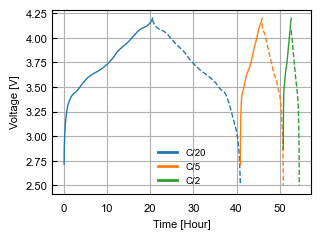

In [5]:
# 컬러 리스트 준비 (스텝 인덱스 순서에 맞게 원하는 색상을 추가)
colors = {4: '#1f77b4', 6: '#1f77b4', 8: '#ff7f0e', 10: '#ff7f0e', 12: '#2ca02c', 14: '#2ca02c'}

fig, ax = plt.subplots(figsize=(fig_width, fig_height))

# 첫 번째 엑셀 파일만 선택
file = excel_files_sort[0]  
file_path = os.path.join(folder_path, file)

# 엑셀 파일 읽기
df = pd.read_excel(file_path, header=0, sheet_name='record')

# 데이터 필터링 함수 (스텝 인덱스별로 데이터 필터링)
def filter_data(df, step_index):
    filtered_df = df[df['Step Index'].isin([step_index])]
    filtered_df.reset_index(drop=True, inplace=True)
    voltage_data = filtered_df['Voltage(V)']
    return voltage_data

# 시간 데이터 누적 변수 초기화
total_time = 0

# 스텝 인덱스 순서대로 시간 데이터를 이어주는 방식으로 플롯
for i, step_index in enumerate([4, 6, 8, 10, 12, 14]):
    voltage_data = filter_data(df, step_index)
    time_data = voltage_data.index * 30 + total_time # 이전 스텝의 시간에 이어지도록 설정
    total_time = time_data.max()  # 이번 스텝의 마지막 시간을 저장하여 다음 스텝에 누적
    
    # 스텝 인덱스에 따른 선 스타일을 설정하여 플롯
    linestyle = '-' if step_index in [4, 8, 12] else '--'
    ax.plot(time_data/3600, voltage_data, linestyle=linestyle, linewidth=1, color=colors[step_index])

# 레전드 추가
ax.plot([], [], linestyle='-', linewidth=2, color='#1f77b4', label='C/20')
ax.plot([], [], linestyle='-', linewidth=2, color='#ff7f0e', label='C/5')
ax.plot([], [], linestyle='-', linewidth=2, color='#2ca02c', label='C/2')

# 축 및 기타 설정
ax.set_xlabel('Time [Hour]')  # X축 타이틀 (인덱스에 30 곱한 값이 시간)
ax.set_ylabel('Voltage [V]')  # Y축 타이틀
ax.grid()
ax.legend(facecolor='white')  # 레전드 추가
plt.savefig("SI Fig1.pdf", dpi=300, bbox_inches="tight", format="pdf")
# 플롯 표시
plt.show()